In [1]:
#import necessary packages

#our workhorses
import numpy as np
import pandas as pd
import scipy

#to visualize
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#style params for figures
sns.set(font_scale = 2)
plt.style.use('seaborn-white')
plt.rc("axes", labelweight="bold")
from IPython.display import display, HTML

#to load files
import os
import h5py

#for stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multitest as multitest
import statsmodels.stats.multicomp

#load custon functions
from EMG_gestures.utils import *

In [6]:
nsubjects = 36

within_results_df = [] 

results_folder = '../results_data/single_subject_training/NN/batch_size_comparison'
for src_subject_id in range(1,nsubjects+1):
    for batch_size in [2,5,10,20,30,40]:
        results_fn = 'subject_%02d_batch_size_%02d_within_subject_results.h5'%(src_subject_id,batch_size)
        subject_df = pd.read_hdf(os.path.join(results_folder,results_fn), 'results_df')
        subject_df['Train_Subject'] = subject_df['Subject']
        subject_df['Test_Subject'] = subject_df['Subject']
        #subject_df['Batch_Size'] = batch_size
        subject_df = subject_df.drop(columns = ['Subject'])
        within_results_df.append(subject_df)

within_results_df = pd.concat(within_results_df,axis = 0)


In [21]:
within_results_df.groupby(['Shuffled','Type','Train_Subject','Batch_Size']).ipynb_checkpoints/mean()

Test_Subject  Epochs  Train_Loss  \
Shuffled Type  Train_Subject Batch_Size                                     
False    Test  1             2                      1  1000.0    0.326939   
                             5                      1  1000.0    0.322005   
                             10                     1  1000.0    0.342932   
                             20                     1  1000.0    0.366264   
                             30                     1  1000.0    0.364426   
...                                               ...     ...         ...   
True     Train 36            5                     36  1000.0    1.383739   
                             10                    36  1000.0    1.506530   
                             20                    36  1000.0    1.586564   
                             30                    36  1000.0    1.665086   
                             40                    36  1000.0    1.732846   

                                         Val_Loss  Epochs_Trained  f1_score  \
Shuffled Type  Train_Subject Batch_Size                                       
False    Test  1             2           0.451830           40.15  0.833760   
                             5           0.454143           58.70  0.831389   
                             10          0.448411           81.85  0.831988   
                             20          0.458198          110.95  0.821892   
                             30          0.456065          142.95  0.828596   
...                                           ...             ...       ...   
True     Train 36            5           2.137041            8.75  0.494967   
                             10          2.022764            9.55  0.451155   
                             20          1.952127           12.20  0.395751   
                             30          1.941757           12.90  0.385115   
                             40          1.899987           13.95  0.344248   

                                         accuracy_score  
Shuffled Type  Train_Subject Batch_Size                  
False    Test  1             2                 0.836298  
                             5                 0.833811  
                             10                0.834655  
                             20                0.824755  
                             30                0.830804  
...                                                 ...  
True     Train 36            5                 0.523799  
                             10                0.487389  
                             20                0.432031  
                             30                0.417601  
                             40                0.377612  

[864 rows x 7 columns]

In [26]:
within_results_df.loc[(within_results_df.Batch_Size==2)&(within_results_df.Type=='Test')&(within_results_df.Shuffled==False)]\
.groupby(['Train_Subject']).mean().sort_values(by='f1_score')

,Shuffled,Test_Subject,Batch_Size,Epochs,Train_Loss,Val_Loss,Epochs_Trained,f1_score,accuracy_score
Train_Subject,,,,,,,,,
26,False,26,2,1000.0,0.330110,0.490388,32.75,0.796471,0.807833
12,False,12,2,1000.0,0.217850,0.527843,22.50,0.800768,0.835446
1,False,1,2,1000.0,0.326939,0.451830,40.15,0.833760,0.836298
30,False,30,2,1000.0,0.252557,0.373170,42.25,0.844853,0.845842
17,False,17,2,1000.0,0.191876,0.420946,39.10,0.845453,0.843315
31,False,31,2,1000.0,0.271467,0.275268,54.65,0.864307,0.864787
23,False,23,2,1000.0,0.176823,0.350013,30.65,0.868722,0.874670
24,False,24,2,1000.0,0.197037,0.292974,47.70,0.877345,0.876435
25,False,25,2,1000.0,0.226071,0.337535,36.60,0.880585,0.886626


In [27]:
within_results_df.loc[within_results_df.Train_Subject==11].groupby(['Shuffled','Type','Batch_Size']).mean()

Train_Subject  Test_Subject  Epochs  Train_Loss  \
Shuffled Type  Batch_Size                                                    
False    Test  2                      11            11  1000.0    0.038210   
               5                      11            11  1000.0    0.050146   
               10                     11            11  1000.0    0.045440   
               20                     11            11  1000.0    0.060784   
               30                     11            11  1000.0    0.061957   
               40                     11            11  1000.0    0.064209   
         Train 2                      11            11  1000.0    0.038210   
               5                      11            11  1000.0    0.050146   
               10                     11            11  1000.0    0.045440   
               20                     11            11  1000.0    0.060784   
               30                     11            11  1000.0    0.061957   
               40                     11            11  1000.0    0.064209   
True     Test  2                      11            11  1000.0    1.174093   
               5                      11            11  1000.0    1.298934   
               10                     11            11  1000.0    1.438579   
               20                     11            11  1000.0    1.563611   
               30                     11            11  1000.0    1.610647   
               40                     11            11  1000.0    1.639897   
         Train 2                      11            11  1000.0    1.174093   
               5                      11            11  1000.0    1.298934   
               10                     11            11  1000.0    1.438579   
               20                     11            11  1000.0    1.563611   
               30                     11            11  1000.0    1.610647   
               40                     11            11  1000.0    1.639897   

                           Val_Loss  Epochs_Trained  f1_score  accuracy_score  
Shuffled Type  Batch_Size                                                      
False    Test  2           0.008755           68.10  0.997676        0.997674  
               5           0.012923          103.35  0.997445        0.997445  
               10          0.010448          161.10  0.998373        0.998372  
               20          0.016421          206.50  0.998146        0.998142  
               30          0.019495          254.65  0.996980        0.996979  
               40          0.017477          308.45  0.997677        0.997675  
         Train 2           0.008755           68.10  1.000000        1.000000  
               5           0.012923          103.35  1.000000        1.000000  
               10          0.010448          161.10  1.000000        1.000000  
               20          0.016421          206.50  1.000000        1.000000  
               30          0.019495          254.65  1.000000        1.000000  
               40          0.017477          308.45  1.000000        1.000000  
True     Test  2           2.371645            6.75  0.153480        0.164012  
               5           2.213416            7.75  0.160197        0.169337  
               10          2.086622            9.30  0.152731        0.167496  
               20          2.050862           10.80  0.173022        0.184876  
               30          2.042357           12.85  0.155001        0.172232  
               40          1.982699           13.05  0.159875        0.178166  
         Train 2           2.371645            6.75  0.593564        0.620815  
               5           2.213416            7.75  0.554507        0.582281  
               10          2.086622            9.30  0.469590        0.508130  
               20          2.050862           10.80  0.440932        0.473459  
               30          2.042357           12.85  0.410585        0.445977 

In [7]:

# Average over multiple train/test splits of the data
within_results_df = within_results_df.groupby(['Shuffled','Type','Train_Subject','Test_Subject','Batch_Size'],as_index = False)\
.mean()\
.drop(columns = ['Fold','Rep'])

# Output summary
display(HTML(within_results_df.groupby(['Shuffled','Type','Batch_Size']).mean().drop(columns = ['Train_Subject','Test_Subject']).to_html()))

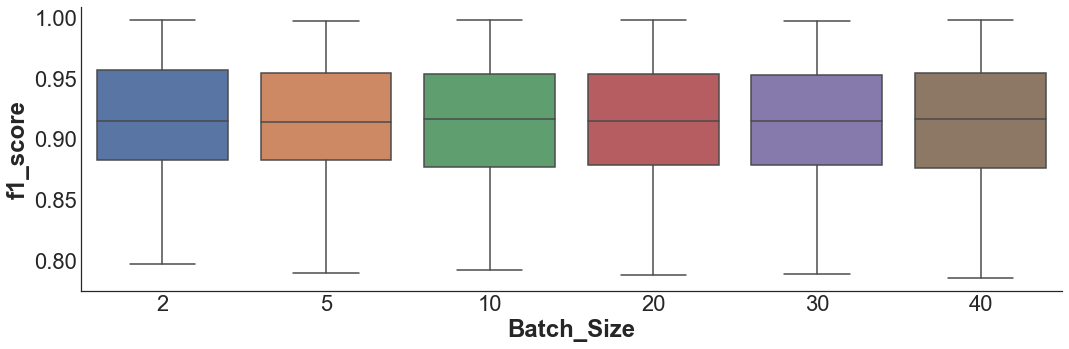

In [31]:
score2use = 'f1_score'
#model_list = np.array[2,5,10,20,30,40]

test_df = within_results_df.loc[within_results_df.Type=='Test']

shuffle_df = test_df.loc[test_df.Shuffled == True]
true_df = test_df.loc[test_df.Shuffled == False]

# # Get confidence interval for shuffled data results
# null_ci = np.zeros((len(model_list),2))

# for j,t in enumerate(model_list):
#     null_df = shuffle_df.loc[shuffle_df.Model == t]
#     null_ci[j,:] = sns.utils.ci(sns.algorithms.bootstrap(null_df[score2use].values))


#make plot
g = sns.catplot(data = true_df, x= 'Batch_Size', y = score2use,\
            kind = 'box', aspect = 3)

# # #Label axes and subpots, mark chance confidence interval
# for i,ax in enumerate(g.axes[0]):
#     ax.set_xlabel('')
#     ax.set_ylim([0,1])
#     ax.set_ylabel('F1_score')
#     for j,t in enumerate(model_list):
#         ax.add_patch(patches.Rectangle(((1*j)-.4, null_ci[j,0]), .8, (null_ci[j,1]-null_ci[j,0]),\
#                                              linewidth=0, fill=True, color='k', alpha=0.2))

sns.despine(fig=g.fig, bottom = False)

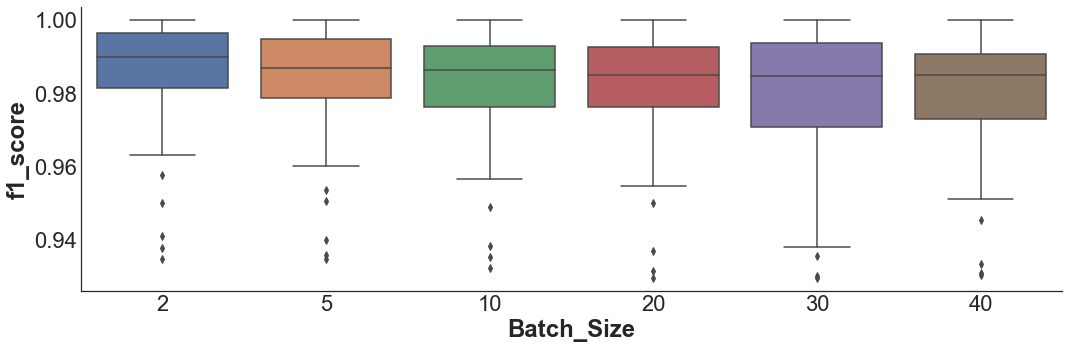

In [10]:
score2use = 'f1_score'
#model_list = np.arange(0,5)

train_df = within_results_df.loc[within_results_df.Type=='Train']

shuffle_df = train_df.loc[train_df.Shuffled == True]
true_df = train_df.loc[train_df.Shuffled == False]

# # Get confidence interval for shuffled data results
# null_ci = np.zeros((len(model_list),2))

# for j,t in enumerate(model_list):
#     null_df = shuffle_df.loc[shuffle_df.Model == t]
#     null_ci[j,:] = sns.utils.ci(sns.algorithms.bootstrap(null_df[score2use].values))


#make plot
g = sns.catplot(data = true_df, x= 'Batch_Size', y = score2use,\
             kind = 'box', aspect = 3)

# # #Label axes and subpots, mark chance confidence interval
# for i,ax in enumerate(g.axes[0]):
#     ax.set_xlabel('')
#     ax.set_ylim([0,1])
#     ax.set_ylabel('F1_score')
#     for j,t in enumerate(model_list):
#         ax.add_patch(patches.Rectangle(((1*j)-.4, null_ci[j,0]), .8, (null_ci[j,1]-null_ci[j,0]),\
#                                              linewidth=0, fill=True, color='k', alpha=0.2))

sns.despine(fig=g.fig, bottom = False)